# ECE421 Assignment #1

### 1.  (5 points)  Implement κ-means yourself. Your function should take in an array containing a  dataset  and  a  value  of κ,  and  return  the  cluster  centroids  along  with  the  cluster assignment  for  each  data  point.   You  may  choose  the  initialization  heuristic  of  yourchoice  among  the  two  we  saw  in  class.   Hand-in  the  code  for  full  credit. For this question, you should not rely on any library other than numPy in Python

In [51]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

In [52]:
bc_datas, bc_labels  = load_breast_cancer(return_X_y = True)


In [53]:
(n_samples, n_features), n_labels = bc_datas.shape, np.unique(bc_labels).size

In [54]:
print(f"# labels: {n_labels}, # samples: {n_samples}, # features: {n_features}")

# labels: 2, # samples: 569, # features: 30


In [55]:
def distance(data, centroid):
    return sum([(data1-data2)**2 for data1, data2 in list(zip(data,centroid))]) ** 0.5

In [56]:
def kmean(dataset, k:int, rseed=1):
    
    # Randomly choose the cluster centroids
    random = np.random.RandomState(rseed)
    c_i = random.permutation(dataset.shape[0])[:k]
    centers = dataset[c_i]
    new_centers = np.zeros(centers.shape)
    
    while True:
        # Create labels variable that will label each points in dataset.
        labels = np.zeros(len(dataset))
        
        # Traverse through entire dataset and calculate the distances between each point and k centroids. 
        for i in range(len(dataset)):
            distances = np.zeros(k)
            for j in range(k):
                distances[j] = distance(dataset[i], centers[j])
            cluster = np.argmin(distances)
            labels[i] = cluster
        
        #update centroids 
        for i in range(k):
            points = [dataset[j] for j in range(len(dataset)) if labels[j] == i ]
            new_centers[i] = np.mean(points, axis=0)

        # Check for convergence
        if np.all(centers == new_centers):
            break
            
        centers = new_centers
        
    return centers, labels

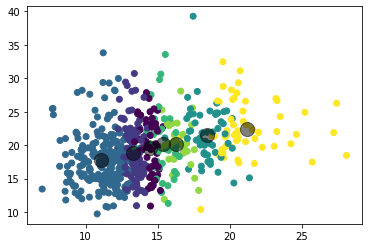

In [57]:
centers, labels = kmean(bc_datas, 7)
plt.scatter(bc_datas[:,0], bc_datas[:,1], c=labels, cmap='viridis', alpha=1)
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)

### 2. Run the κ-means algorithm for values of κ varying between 2 and 7, at incre-ments of 1.  Justify in your answer which data you passed as the input to the κ-means algorithm.

In [58]:
q2_results = []
for i in range(2, 8):
    center, labels = kmean(bc_datas, i)
    q2_results.append((center, labels))

- the input parameters to k-mean algorithm were breast cancer dataset with number of cluster centroids(k) as shown in the function def kmean(dataset, k:int, rseed=1).

### 3.  (2 points)  Plot  the  distortion  achieved  by κ-means  for  values  of κ varying  between  2 and 7, at increments of 1.  Hand-in the code and figure output for full credit.  For thisquestion, you may rely on plotting libraries such as matplotlib.

- use elbow method to determine that at k-3 the value decrease dramatically

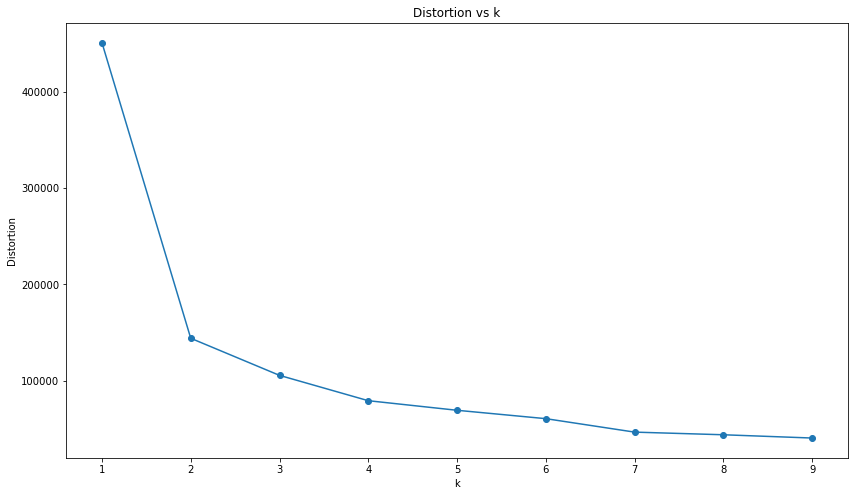

In [59]:
def calculate_distortion(centers, datasets):
    means = centers
    s = 0
    for x in bc_datas:
        best = float("inf")
        for y in means:
            d = (x-y).T.dot(x-y)
            if d < best:
                best = d
        s += best  
    return s/datasets.shape[0]

distortion = []
K = range(1,10)

for i in K:
    distortion.append(calculate_distortion(kmean(bc_datas, i)[0], bc_datas))
distortion


plt.figure(figsize=(14,8))
plt.title("Distortion vs k")
plt.plot(K, distortion, marker='o')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

### 4.  (1 point)  If you had to pick one value of κ, which value would you pick?  Justify your choice.

According to the figure provided by number 3, the rate in which distortion decreases rapidly decrease when k is around 2. Therefore using the elbow method, we can conclude that elbow is located around k=2, and this is evidiently good choice for the dataset 